In [1]:
# from sqlalchemy import create_engine
import pandas as pd
import numpy as np
# from binance import Client
import matplotlib.pyplot as plt
# import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import sys
import ta
import yaml
from data import *
import os
sys.path.insert(1, '/Users/arsenchik/Desktop/dipploma/machine_learning_in_hft/algotrading/backtesting')
from backtest import * 
from strategies import *
from config import *
# color_pal = sns.color_palette()
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import (
    log_loss,
    roc_auc_score,
    f1_score,
    mean_squared_error,
    accuracy_score,
    r2_score,
    mean_absolute_error,
)
from model import *

In [2]:
df = get_actual_data('BTCUSDT', end_date='10000 hours ago UTC')

In [14]:
df.shape

(600008, 5)

In [2]:
df = pd.read_csv('data.csv', index_col=False)
df.set_index(['Time'], inplace=True)
df.head()

Open      High       Low     Close    Volume
Time                                                                 
2022-01-03 23:06:00  46293.89  46363.56  46293.89  46313.06  35.34215
2022-01-03 23:07:00  46313.05  46334.60  46262.16  46299.58  16.99444
2022-01-03 23:08:00  46299.58  46326.37  46294.44  46294.45  12.07571
2022-01-03 23:09:00  46294.44  46310.55  46250.33  46293.49  13.63073
2022-01-03 23:10:00  46293.48  46383.68  46290.00  46351.99  31.07135

In [3]:
from dataset import *

data = Data(df)
data.create_features_and_target(task_type='classification')

In [3]:
from run import run
result_dir_path = '/home/kenny/algotrading/model_training/feature_exps_results'
data_path = '/home/kenny/algotrading/model_training/data.csv'
exps = [17, 18, 19, 20, 21, 22, 23, 24]
run(result_dir_path, data_path, exps, 'LightGBM', 'classification', 'roc_auc')

[1]	training's binary_logloss: 0.69303
[1]	training's binary_logloss: 0.692878
[1]	training's binary_logloss: 0.693067
[1]	training's binary_logloss: 0.693066
[1]	training's binary_logloss: 0.692877
[1]	training's binary_logloss: 0.692875
[1]	training's binary_logloss: 0.692875
[1]	training's binary_logloss: 0.692875
[2]	training's binary_logloss: 0.692949
[2]	training's binary_logloss: 0.693018
[2]	training's binary_logloss: 0.692668
[2]	training's binary_logloss: 0.693018
[2]	training's binary_logloss: 0.692667
[2]	training's binary_logloss: 0.692662
[2]	training's binary_logloss: 0.692662
[2]	training's binary_logloss: 0.692663
[3]	training's binary_logloss: 0.692878
[3]	training's binary_logloss: 0.692979
[3]	training's binary_logloss: 0.692977
[3]	training's binary_logloss: 0.692497
[3]	training's binary_logloss: 0.692495
[3]	training's binary_logloss: 0.692478
[3]	training's binary_logloss: 0.692478
[3]	training's binary_logloss: 0.692478
[4]	training's binary_logloss: 0.692805
[

### Судя по результатам экспериментов лучшее качество на roc-auc: 0.5385 на 24 эксперименте и на 20 тоже

#### Рассмотрим FEATURES из 24 эксперимента

In [4]:
import json

res_24 = '/home/kenny/algotrading/model_training/feature_exps_results/classification/LightGBM/res-24'
with open(res_24) as f:
    result = json.load(f)
features_24 = result['features']

In [5]:
model = Model("LightGBM")
optimize_results = '/home/kenny/algotrading/model_training/optimization_results'
model.optimize(data, optimize_results, features_24)

  0%|          | 0/4 [00:00<?, ?it/s][I 2023-02-25 09:31:07,382] A new study created in memory with name: classification LightGBM with metric - log_loss


[LightGBM] [Warning] early_stopping_round is set=188, early_stopping_rounds=188 will be ignored. Current value: early_stopping_round=188
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=1.1680485993021956, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1680485993021956
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logloss: 0.693073
[2]	valid_0's binary_logloss: 0.69289
[3]	valid_0's binary_logloss: 0.692772
[4]	valid_0's binary_logloss: 0.692695
[5

[I 2023-02-25 09:31:36,366] Trial 0 finished with value: 17.43511611439128 and parameters: {'n_estimators': 10000, 'learning_rate': 0.110274671097312, 'num_leaves': 1820, 'max_depth': 6, 'lambda_l1': 65, 'lambda_l2': 90, 'min_gain_to_split': 1.1680485993021956, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.8, 'early_stopping_rounds': 188}. Best is trial 0 with value: 17.43511611439128.


[228]	valid_0's binary_logloss: 0.692287
[229]	valid_0's binary_logloss: 0.69229
[230]	valid_0's binary_logloss: 0.692287
[231]	valid_0's binary_logloss: 0.692287
[LightGBM] [Warning] early_stopping_round is set=129, early_stopping_rounds=129 will be ignored. Current value: early_stopping_round=129
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=2.5175463042655313, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5175463042655313
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be

[I 2023-02-25 09:31:47,967] Trial 1 finished with value: 17.55225798790591 and parameters: {'n_estimators': 10000, 'learning_rate': 0.18373647288370157, 'num_leaves': 760, 'max_depth': 11, 'lambda_l1': 100, 'lambda_l2': 30, 'min_gain_to_split': 2.5175463042655313, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 129}. Best is trial 0 with value: 17.43511611439128.


[143]	valid_0's binary_logloss: 0.692296
[144]	valid_0's binary_logloss: 0.692296
[145]	valid_0's binary_logloss: 0.692296
[146]	valid_0's binary_logloss: 0.692296
[147]	valid_0's binary_logloss: 0.692296
[148]	valid_0's binary_logloss: 0.692296
[149]	valid_0's binary_logloss: 0.692296
[150]	valid_0's binary_logloss: 0.692296
[151]	valid_0's binary_logloss: 0.692296
[152]	valid_0's binary_logloss: 0.692296
[153]	valid_0's binary_logloss: 0.692274
[154]	valid_0's binary_logloss: 0.692274
[155]	valid_0's binary_logloss: 0.692274
[156]	valid_0's binary_logloss: 0.692274
[157]	valid_0's binary_logloss: 0.692274
[158]	valid_0's binary_logloss: 0.692274
[159]	valid_0's binary_logloss: 0.692274
[160]	valid_0's binary_logloss: 0.692274
[LightGBM] [Warning] early_stopping_round is set=422, early_stopping_rounds=422 will be ignored. Current value: early_stopping_round=422
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bag

[I 2023-02-25 09:32:11,036] Trial 2 finished with value: 17.649375609537696 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1266058172950309, 'num_leaves': 60, 'max_depth': 11, 'lambda_l1': 65, 'lambda_l2': 50, 'min_gain_to_split': 14.483377407240381, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 422}. Best is trial 0 with value: 17.43511611439128.


[462]	valid_0's binary_logloss: 0.692184
[463]	valid_0's binary_logloss: 0.692184
[464]	valid_0's binary_logloss: 0.692184
[465]	valid_0's binary_logloss: 0.692184
[466]	valid_0's binary_logloss: 0.692184
[467]	valid_0's binary_logloss: 0.692184
[468]	valid_0's binary_logloss: 0.692184
[469]	valid_0's binary_logloss: 0.692184
[LightGBM] [Warning] early_stopping_round is set=245, early_stopping_rounds=245 will be ignored. Current value: early_stopping_round=245
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.079867123736364, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.079867123736364
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_byt

[I 2023-02-25 09:32:26,695] Trial 3 finished with value: 17.53824101158792 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2400928556200028, 'num_leaves': 1680, 'max_depth': 3, 'lambda_l1': 70, 'lambda_l2': 15, 'min_gain_to_split': 1.079867123736364, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 245}. Best is trial 0 with value: 17.43511611439128.


[249]	valid_0's binary_logloss: 0.692403
[250]	valid_0's binary_logloss: 0.692403
[251]	valid_0's binary_logloss: 0.692403
[252]	valid_0's binary_logloss: 0.692403
[253]	valid_0's binary_logloss: 0.692403
[254]	valid_0's binary_logloss: 0.692403
[255]	valid_0's binary_logloss: 0.692403
[256]	valid_0's binary_logloss: 0.692403
[257]	valid_0's binary_logloss: 0.692403
[258]	valid_0's binary_logloss: 0.692403
[259]	valid_0's binary_logloss: 0.692403
[260]	valid_0's binary_logloss: 0.692403
[261]	valid_0's binary_logloss: 0.692403
[262]	valid_0's binary_logloss: 0.692403
[263]	valid_0's binary_logloss: 0.692403
[LightGBM] [Warning] early_stopping_round is set=385, early_stopping_rounds=385 will be ignored. Current value: early_stopping_round=385
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_

[I 2023-02-25 09:32:52,375] Trial 4 finished with value: 17.47316219296868 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11207466464797812, 'num_leaves': 1040, 'max_depth': 11, 'lambda_l1': 70, 'lambda_l2': 100, 'min_gain_to_split': 14.243324210498312, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9, 'early_stopping_rounds': 385}. Best is trial 0 with value: 17.43511611439128.


[405]	valid_0's binary_logloss: 0.692209
[406]	valid_0's binary_logloss: 0.692209
[407]	valid_0's binary_logloss: 0.692209
[408]	valid_0's binary_logloss: 0.692209
[409]	valid_0's binary_logloss: 0.692209
[410]	valid_0's binary_logloss: 0.692209
[411]	valid_0's binary_logloss: 0.692209
[412]	valid_0's binary_logloss: 0.692209
[413]	valid_0's binary_logloss: 0.692209
[414]	valid_0's binary_logloss: 0.692209
[415]	valid_0's binary_logloss: 0.692209
[416]	valid_0's binary_logloss: 0.692209
[LightGBM] [Warning] early_stopping_round is set=459, early_stopping_rounds=459 will be ignored. Current value: early_stopping_round=459
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=2.5753511896223307, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.5753511896223307

[I 2023-02-25 09:33:21,514] Trial 5 finished with value: 17.52021918489336 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2998725289428355, 'num_leaves': 2120, 'max_depth': 7, 'lambda_l1': 25, 'lambda_l2': 70, 'min_gain_to_split': 2.5753511896223307, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.7, 'early_stopping_rounds': 459}. Best is trial 0 with value: 17.43511611439128.


[528]	valid_0's binary_logloss: 0.692919
[529]	valid_0's binary_logloss: 0.69292
[530]	valid_0's binary_logloss: 0.692925
[531]	valid_0's binary_logloss: 0.692974
[532]	valid_0's binary_logloss: 0.692965
[533]	valid_0's binary_logloss: 0.692952
[534]	valid_0's binary_logloss: 0.692869
[535]	valid_0's binary_logloss: 0.692869
[536]	valid_0's binary_logloss: 0.69286
[537]	valid_0's binary_logloss: 0.692855
[538]	valid_0's binary_logloss: 0.692844
[539]	valid_0's binary_logloss: 0.692878
[540]	valid_0's binary_logloss: 0.692899
[541]	valid_0's binary_logloss: 0.692905
[LightGBM] [Warning] early_stopping_round is set=87, early_stopping_rounds=87 will be ignored. Current value: early_stopping_round=87
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is se

[I 2023-02-25 09:33:29,373] Trial 6 finished with value: 17.531232523428926 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2597168869369799, 'num_leaves': 1720, 'max_depth': 12, 'lambda_l1': 90, 'lambda_l2': 75, 'min_gain_to_split': 14.241432033155819, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 87}. Best is trial 0 with value: 17.43511611439128.


[180]	valid_0's binary_logloss: 0.692102
[181]	valid_0's binary_logloss: 0.692102
[182]	valid_0's binary_logloss: 0.692102
[183]	valid_0's binary_logloss: 0.692102
[184]	valid_0's binary_logloss: 0.692102
[185]	valid_0's binary_logloss: 0.692102
[186]	valid_0's binary_logloss: 0.692102
[187]	valid_0's binary_logloss: 0.692102
[188]	valid_0's binary_logloss: 0.692102
[189]	valid_0's binary_logloss: 0.692102
[190]	valid_0's binary_logloss: 0.692102
[191]	valid_0's binary_logloss: 0.692102
[192]	valid_0's binary_logloss: 0.692102
[193]	valid_0's binary_logloss: 0.692102
[194]	valid_0's binary_logloss: 0.692102
[195]	valid_0's binary_logloss: 0.692102
[196]	valid_0's binary_logloss: 0.692102
[LightGBM] [Warning] early_stopping_round is set=339, early_stopping_rounds=339 will be ignored. Current value: early_stopping_round=339
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 w

[I 2023-02-25 09:33:48,599] Trial 7 finished with value: 17.582294365730174 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1794363629945909, 'num_leaves': 2560, 'max_depth': 4, 'lambda_l1': 70, 'lambda_l2': 55, 'min_gain_to_split': 8.802572960723, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 339}. Best is trial 0 with value: 17.43511611439128.


[466]	valid_0's binary_logloss: 0.692223
[467]	valid_0's binary_logloss: 0.692223
[468]	valid_0's binary_logloss: 0.692223
[469]	valid_0's binary_logloss: 0.692225
[470]	valid_0's binary_logloss: 0.692225
[471]	valid_0's binary_logloss: 0.692225
[472]	valid_0's binary_logloss: 0.692225
[473]	valid_0's binary_logloss: 0.692225
[474]	valid_0's binary_logloss: 0.692225
[475]	valid_0's binary_logloss: 0.692225
[LightGBM] [Warning] early_stopping_round is set=381, early_stopping_rounds=381 will be ignored. Current value: early_stopping_round=381
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=9.732920935891434, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.732920935891434
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current v

[I 2023-02-25 09:34:17,114] Trial 8 finished with value: 17.551256775311767 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06676131943397125, 'num_leaves': 1660, 'max_depth': 12, 'lambda_l1': 25, 'lambda_l2': 45, 'min_gain_to_split': 9.732920935891434, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8, 'early_stopping_rounds': 381}. Best is trial 0 with value: 17.43511611439128.


[431]	valid_0's binary_logloss: 0.692244
[432]	valid_0's binary_logloss: 0.692244
[433]	valid_0's binary_logloss: 0.692244
[LightGBM] [Warning] early_stopping_round is set=331, early_stopping_rounds=331 will be ignored. Current value: early_stopping_round=331
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=13.056143450955831, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.056143450955831
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1

[I 2023-02-25 09:34:39,616] Trial 9 finished with value: 17.624345294684144 and parameters: {'n_estimators': 10000, 'learning_rate': 0.12018057284360807, 'num_leaves': 2580, 'max_depth': 12, 'lambda_l1': 40, 'lambda_l2': 15, 'min_gain_to_split': 13.056143450955831, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 331}. Best is trial 0 with value: 17.43511611439128.
 25%|██▌       | 1/4 [03:32<10:36, 212.24s/it][I 2023-02-25 09:34:39,619] A new study created in memory with name: classification LightGBM with metric - accuracy


[832]	valid_0's binary_logloss: 0.692207
[833]	valid_0's binary_logloss: 0.692207
[834]	valid_0's binary_logloss: 0.692207
[835]	valid_0's binary_logloss: 0.692207
[836]	valid_0's binary_logloss: 0.692207
[837]	valid_0's binary_logloss: 0.692207
[838]	valid_0's binary_logloss: 0.692207
[839]	valid_0's binary_logloss: 0.692207
[840]	valid_0's binary_logloss: 0.692207
[841]	valid_0's binary_logloss: 0.692207
[LightGBM] [Warning] early_stopping_round is set=245, early_stopping_rounds=245 will be ignored. Current value: early_stopping_round=245
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=9.330969698262512, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.330969698262512
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambd

[I 2023-02-25 09:35:01,315] Trial 0 finished with value: 0.5120277777777777 and parameters: {'n_estimators': 10000, 'learning_rate': 0.03904671769268915, 'num_leaves': 1920, 'max_depth': 8, 'lambda_l1': 25, 'lambda_l2': 85, 'min_gain_to_split': 9.330969698262512, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.9, 'early_stopping_rounds': 245}. Best is trial 0 with value: 0.5120277777777777.


[378]	valid_0's binary_logloss: 0.692248
[379]	valid_0's binary_logloss: 0.692248
[380]	valid_0's binary_logloss: 0.692248
[381]	valid_0's binary_logloss: 0.692248
[382]	valid_0's binary_logloss: 0.692248
[383]	valid_0's binary_logloss: 0.692248
[384]	valid_0's binary_logloss: 0.692248
[385]	valid_0's binary_logloss: 0.692248
[386]	valid_0's binary_logloss: 0.692248
[387]	valid_0's binary_logloss: 0.692248
[LightGBM] [Warning] early_stopping_round is set=186, early_stopping_rounds=186 will be ignored. Current value: early_stopping_round=186
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=0.3377014851653831, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3377014851653831
[LightGBM] [Warning] lambda_l2 is set=5, reg_lamb

[I 2023-02-25 09:35:25,249] Trial 1 finished with value: 0.5171111111111111 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14768044884525974, 'num_leaves': 980, 'max_depth': 7, 'lambda_l1': 30, 'lambda_l2': 5, 'min_gain_to_split': 0.3377014851653831, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 186}. Best is trial 1 with value: 0.5171111111111111.


[LightGBM] [Warning] early_stopping_round is set=164, early_stopping_rounds=164 will be ignored. Current value: early_stopping_round=164
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=8.18937516441021, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.18937516441021
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logloss: 0.692803
[2]	valid_0's binary_logloss: 0.692629
[3]	valid_0's binary_logloss: 0.692485
[4]	valid_0's binary_logloss: 0.692436
[5]	v

[I 2023-02-25 09:35:38,106] Trial 2 finished with value: 0.5141944444444444 and parameters: {'n_estimators': 10000, 'learning_rate': 0.23235566619947245, 'num_leaves': 740, 'max_depth': 3, 'lambda_l1': 95, 'lambda_l2': 60, 'min_gain_to_split': 8.18937516441021, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9, 'early_stopping_rounds': 164}. Best is trial 1 with value: 0.5171111111111111.


[179]	valid_0's binary_logloss: 0.692119
[180]	valid_0's binary_logloss: 0.692119
[181]	valid_0's binary_logloss: 0.692119
[182]	valid_0's binary_logloss: 0.692119
[183]	valid_0's binary_logloss: 0.692119
[184]	valid_0's binary_logloss: 0.692119
[185]	valid_0's binary_logloss: 0.692119
[186]	valid_0's binary_logloss: 0.692119
[187]	valid_0's binary_logloss: 0.692119
[188]	valid_0's binary_logloss: 0.692119
[189]	valid_0's binary_logloss: 0.692119
[190]	valid_0's binary_logloss: 0.692119
[191]	valid_0's binary_logloss: 0.692119
[192]	valid_0's binary_logloss: 0.692119
[193]	valid_0's binary_logloss: 0.692119
[194]	valid_0's binary_logloss: 0.692119
[195]	valid_0's binary_logloss: 0.692119
[196]	valid_0's binary_logloss: 0.692119
[LightGBM] [Warning] early_stopping_round is set=437, early_stopping_rounds=437 will be ignored. Current value: early_stopping_round=437
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bag

[I 2023-02-25 09:36:04,357] Trial 3 finished with value: 0.5130555555555555 and parameters: {'n_estimators': 10000, 'learning_rate': 0.10903094690891532, 'num_leaves': 2240, 'max_depth': 8, 'lambda_l1': 65, 'lambda_l2': 100, 'min_gain_to_split': 14.972513711361849, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.4, 'early_stopping_rounds': 437}. Best is trial 1 with value: 0.5171111111111111.


[1453]	valid_0's binary_logloss: 0.692156
[1454]	valid_0's binary_logloss: 0.692156
[1455]	valid_0's binary_logloss: 0.692156
[1456]	valid_0's binary_logloss: 0.692156
[1457]	valid_0's binary_logloss: 0.692156
[1458]	valid_0's binary_logloss: 0.692156
[1459]	valid_0's binary_logloss: 0.692156
[1460]	valid_0's binary_logloss: 0.692156
[1461]	valid_0's binary_logloss: 0.692156
[1462]	valid_0's binary_logloss: 0.692156
[1463]	valid_0's binary_logloss: 0.692156
[1464]	valid_0's binary_logloss: 0.692156
[1465]	valid_0's binary_logloss: 0.692156
[1466]	valid_0's binary_logloss: 0.692156
[1467]	valid_0's binary_logloss: 0.692156
[1468]	valid_0's binary_logloss: 0.692156
[1469]	valid_0's binary_logloss: 0.692156
[1470]	valid_0's binary_logloss: 0.692156
[1471]	valid_0's binary_logloss: 0.692156
[1472]	valid_0's binary_logloss: 0.692156
[1473]	valid_0's binary_logloss: 0.692156
[1474]	valid_0's binary_logloss: 0.692156
[1475]	valid_0's binary_logloss: 0.692156
[1476]	valid_0's binary_logloss: 0

[I 2023-02-25 09:36:17,799] Trial 4 finished with value: 0.5131111111111111 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11963201160842012, 'num_leaves': 440, 'max_depth': 10, 'lambda_l1': 100, 'lambda_l2': 85, 'min_gain_to_split': 7.552597122910571, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.8, 'early_stopping_rounds': 164}. Best is trial 1 with value: 0.5171111111111111.


[218]	valid_0's binary_logloss: 0.692205
[219]	valid_0's binary_logloss: 0.692205
[220]	valid_0's binary_logloss: 0.692205
[221]	valid_0's binary_logloss: 0.692205
[222]	valid_0's binary_logloss: 0.692205
[223]	valid_0's binary_logloss: 0.692205
[224]	valid_0's binary_logloss: 0.692205
[225]	valid_0's binary_logloss: 0.692205
[226]	valid_0's binary_logloss: 0.692205
[227]	valid_0's binary_logloss: 0.692205
[228]	valid_0's binary_logloss: 0.692205
[LightGBM] [Warning] early_stopping_round is set=330, early_stopping_rounds=330 will be ignored. Current value: early_stopping_round=330
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=3.5120749060260117, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.5120749060260117
[LightGBM] [Warning] lambda_l2 is set=30

[I 2023-02-25 09:36:53,903] Trial 5 finished with value: 0.5131944444444444 and parameters: {'n_estimators': 10000, 'learning_rate': 0.037444194827304884, 'num_leaves': 2480, 'max_depth': 12, 'lambda_l1': 90, 'lambda_l2': 30, 'min_gain_to_split': 3.5120749060260117, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 330}. Best is trial 1 with value: 0.5171111111111111.


[643]	valid_0's binary_logloss: 0.692195
[644]	valid_0's binary_logloss: 0.692195
[645]	valid_0's binary_logloss: 0.692195
[646]	valid_0's binary_logloss: 0.692199
[647]	valid_0's binary_logloss: 0.692199
[648]	valid_0's binary_logloss: 0.692199
[649]	valid_0's binary_logloss: 0.692198
[650]	valid_0's binary_logloss: 0.692198
[651]	valid_0's binary_logloss: 0.692198
[652]	valid_0's binary_logloss: 0.692198
[653]	valid_0's binary_logloss: 0.692198
[654]	valid_0's binary_logloss: 0.692198
[655]	valid_0's binary_logloss: 0.692206
[656]	valid_0's binary_logloss: 0.692206
[LightGBM] [Warning] early_stopping_round is set=72, early_stopping_rounds=72 will be ignored. Current value: early_stopping_round=72
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=7.3820270700099435, min_split_

[I 2023-02-25 09:37:06,421] Trial 6 finished with value: 0.5125555555555555 and parameters: {'n_estimators': 10000, 'learning_rate': 0.055821196489811736, 'num_leaves': 260, 'max_depth': 11, 'lambda_l1': 5, 'lambda_l2': 95, 'min_gain_to_split': 7.3820270700099435, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7, 'early_stopping_rounds': 72}. Best is trial 1 with value: 0.5171111111111111.


[116]	valid_0's binary_logloss: 0.69219
[117]	valid_0's binary_logloss: 0.69219
[118]	valid_0's binary_logloss: 0.69219
[119]	valid_0's binary_logloss: 0.69219
[120]	valid_0's binary_logloss: 0.69219
[121]	valid_0's binary_logloss: 0.69219
[122]	valid_0's binary_logloss: 0.69219
[123]	valid_0's binary_logloss: 0.69219
[124]	valid_0's binary_logloss: 0.69219
[125]	valid_0's binary_logloss: 0.69219
[126]	valid_0's binary_logloss: 0.69219
[127]	valid_0's binary_logloss: 0.69219
[128]	valid_0's binary_logloss: 0.69219
[129]	valid_0's binary_logloss: 0.69219
[130]	valid_0's binary_logloss: 0.69219
[131]	valid_0's binary_logloss: 0.69219
[LightGBM] [Warning] early_stopping_round is set=456, early_stopping_rounds=456 will be ignored. Current value: early_stopping_round=456
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[Ligh

[I 2023-02-25 09:37:46,599] Trial 7 finished with value: 0.5146388888888889 and parameters: {'n_estimators': 10000, 'learning_rate': 0.02350444211073421, 'num_leaves': 2440, 'max_depth': 5, 'lambda_l1': 50, 'lambda_l2': 15, 'min_gain_to_split': 7.7974176494540846, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 456}. Best is trial 1 with value: 0.5171111111111111.


[749]	valid_0's binary_logloss: 0.692205
[LightGBM] [Warning] early_stopping_round is set=354, early_stopping_rounds=354 will be ignored. Current value: early_stopping_round=354
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=2.657763906099687, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.657763906099687
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logloss: 0.693058
[2]	valid_0's binary_logloss: 0.692873
[3]	valid_0's binary_logloss: 0.692718
[

[I 2023-02-25 09:38:13,037] Trial 8 finished with value: 0.5134166666666667 and parameters: {'n_estimators': 10000, 'learning_rate': 0.125805094772422, 'num_leaves': 320, 'max_depth': 4, 'lambda_l1': 80, 'lambda_l2': 35, 'min_gain_to_split': 2.657763906099687, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5, 'early_stopping_rounds': 354}. Best is trial 1 with value: 0.5171111111111111.


[368]	valid_0's binary_logloss: 0.69225
[369]	valid_0's binary_logloss: 0.69225
[370]	valid_0's binary_logloss: 0.69225
[371]	valid_0's binary_logloss: 0.69225
[372]	valid_0's binary_logloss: 0.69225
[373]	valid_0's binary_logloss: 0.69225
[374]	valid_0's binary_logloss: 0.69225
[375]	valid_0's binary_logloss: 0.69225
[376]	valid_0's binary_logloss: 0.69225
[377]	valid_0's binary_logloss: 0.69225
[378]	valid_0's binary_logloss: 0.69225
[379]	valid_0's binary_logloss: 0.69225
[380]	valid_0's binary_logloss: 0.69225
[381]	valid_0's binary_logloss: 0.69225
[382]	valid_0's binary_logloss: 0.69225
[383]	valid_0's binary_logloss: 0.69225
[384]	valid_0's binary_logloss: 0.69225
[385]	valid_0's binary_logloss: 0.69225
[LightGBM] [Warning] early_stopping_round is set=206, early_stopping_rounds=206 will be ignored. Current value: early_stopping_round=206
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is s

[I 2023-02-25 09:38:25,965] Trial 9 finished with value: 0.5119444444444444 and parameters: {'n_estimators': 10000, 'learning_rate': 0.25465055137616033, 'num_leaves': 2420, 'max_depth': 7, 'lambda_l1': 75, 'lambda_l2': 60, 'min_gain_to_split': 13.832124983561787, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.9, 'early_stopping_rounds': 206}. Best is trial 1 with value: 0.5171111111111111.
 50%|█████     | 2/4 [07:18<07:21, 220.54s/it][I 2023-02-25 09:38:25,968] A new study created in memory with name: classification LightGBM with metric - roc_auc


[216]	valid_0's binary_logloss: 0.692173
[217]	valid_0's binary_logloss: 0.692173
[218]	valid_0's binary_logloss: 0.692173
[LightGBM] [Warning] early_stopping_round is set=88, early_stopping_rounds=88 will be ignored. Current value: early_stopping_round=88
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=6.80529726333367, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.80529726333367
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid

[I 2023-02-25 09:38:33,304] Trial 0 finished with value: 0.5110352165101585 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2201881670045178, 'num_leaves': 2840, 'max_depth': 6, 'lambda_l1': 75, 'lambda_l2': 15, 'min_gain_to_split': 6.80529726333367, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.7, 'early_stopping_rounds': 88}. Best is trial 0 with value: 0.5110352165101585.


[85]	valid_0's binary_logloss: 0.692204
[86]	valid_0's binary_logloss: 0.692204
[87]	valid_0's binary_logloss: 0.692204
[88]	valid_0's binary_logloss: 0.692204
[89]	valid_0's binary_logloss: 0.692204
[90]	valid_0's binary_logloss: 0.692204
[91]	valid_0's binary_logloss: 0.692204
[92]	valid_0's binary_logloss: 0.692204
[93]	valid_0's binary_logloss: 0.692204
[94]	valid_0's binary_logloss: 0.692204
[95]	valid_0's binary_logloss: 0.692204
[96]	valid_0's binary_logloss: 0.692204
[97]	valid_0's binary_logloss: 0.692204
[98]	valid_0's binary_logloss: 0.692204
[99]	valid_0's binary_logloss: 0.692204
[100]	valid_0's binary_logloss: 0.692204
[101]	valid_0's binary_logloss: 0.692204
[102]	valid_0's binary_logloss: 0.692204
[103]	valid_0's binary_logloss: 0.692204
[LightGBM] [Warning] early_stopping_round is set=352, early_stopping_rounds=352 will be ignored. Current value: early_stopping_round=352
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5

[I 2023-02-25 09:38:56,492] Trial 1 finished with value: 0.513208576512098 and parameters: {'n_estimators': 10000, 'learning_rate': 0.0979833560576336, 'num_leaves': 2860, 'max_depth': 11, 'lambda_l1': 50, 'lambda_l2': 15, 'min_gain_to_split': 8.164193512248827, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4, 'early_stopping_rounds': 352}. Best is trial 1 with value: 0.513208576512098.


[377]	valid_0's binary_logloss: 0.692228
[378]	valid_0's binary_logloss: 0.692228
[379]	valid_0's binary_logloss: 0.692228
[380]	valid_0's binary_logloss: 0.692228
[381]	valid_0's binary_logloss: 0.692228
[382]	valid_0's binary_logloss: 0.692231
[383]	valid_0's binary_logloss: 0.692231
[384]	valid_0's binary_logloss: 0.692231
[385]	valid_0's binary_logloss: 0.692231
[386]	valid_0's binary_logloss: 0.692229
[387]	valid_0's binary_logloss: 0.692229
[388]	valid_0's binary_logloss: 0.692229
[389]	valid_0's binary_logloss: 0.692229
[390]	valid_0's binary_logloss: 0.692229
[391]	valid_0's binary_logloss: 0.69223
[392]	valid_0's binary_logloss: 0.69223
[393]	valid_0's binary_logloss: 0.69223
[394]	valid_0's binary_logloss: 0.69223
[LightGBM] [Warning] early_stopping_round is set=83, early_stopping_rounds=83 will be ignored. Current value: early_stopping_round=83
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] bagging_fr

[I 2023-02-25 09:39:05,234] Trial 2 finished with value: 0.51255354096965 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1407016791267446, 'num_leaves': 1660, 'max_depth': 3, 'lambda_l1': 30, 'lambda_l2': 100, 'min_gain_to_split': 1.4988040313795654, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 83}. Best is trial 1 with value: 0.513208576512098.


[100]	valid_0's binary_logloss: 0.692344
[101]	valid_0's binary_logloss: 0.692342
[102]	valid_0's binary_logloss: 0.692338
[103]	valid_0's binary_logloss: 0.69234
[104]	valid_0's binary_logloss: 0.69235
[105]	valid_0's binary_logloss: 0.692349
[106]	valid_0's binary_logloss: 0.692349
[107]	valid_0's binary_logloss: 0.692355
[108]	valid_0's binary_logloss: 0.692355
[109]	valid_0's binary_logloss: 0.692355
[110]	valid_0's binary_logloss: 0.692355
[111]	valid_0's binary_logloss: 0.692355
[112]	valid_0's binary_logloss: 0.692355
[113]	valid_0's binary_logloss: 0.69236
[LightGBM] [Warning] early_stopping_round is set=349, early_stopping_rounds=349 will be ignored. Current value: early_stopping_round=349
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is se

[I 2023-02-25 09:39:43,845] Trial 3 finished with value: 0.5129467138428092 and parameters: {'n_estimators': 10000, 'learning_rate': 0.015159218636734837, 'num_leaves': 220, 'max_depth': 4, 'lambda_l1': 70, 'lambda_l2': 25, 'min_gain_to_split': 4.970550001431334, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 349}. Best is trial 1 with value: 0.513208576512098.


[LightGBM] [Warning] early_stopping_round is set=378, early_stopping_rounds=378 will be ignored. Current value: early_stopping_round=378
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=12.192376416446765, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.192376416446765
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logloss: 0.693183
[2]	valid_0's binary_logloss: 0.693183
[3]	valid_0's binary_logloss: 0.693147
[4]	valid_0's binary_logloss: 0.692908
[

[I 2023-02-25 09:40:02,027] Trial 4 finished with value: 0.5135140476466035 and parameters: {'n_estimators': 10000, 'learning_rate': 0.23988865249336208, 'num_leaves': 1360, 'max_depth': 5, 'lambda_l1': 50, 'lambda_l2': 90, 'min_gain_to_split': 12.192376416446765, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 378}. Best is trial 4 with value: 0.5135140476466035.


[689]	valid_0's binary_logloss: 0.692123
[690]	valid_0's binary_logloss: 0.692123
[691]	valid_0's binary_logloss: 0.692123
[692]	valid_0's binary_logloss: 0.692123
[693]	valid_0's binary_logloss: 0.692123
[694]	valid_0's binary_logloss: 0.692123
[695]	valid_0's binary_logloss: 0.692123
[696]	valid_0's binary_logloss: 0.692123
[697]	valid_0's binary_logloss: 0.692123
[698]	valid_0's binary_logloss: 0.692123
[699]	valid_0's binary_logloss: 0.692123
[700]	valid_0's binary_logloss: 0.692123
[701]	valid_0's binary_logloss: 0.692123
[702]	valid_0's binary_logloss: 0.692123
[703]	valid_0's binary_logloss: 0.692123
[704]	valid_0's binary_logloss: 0.692123
[LightGBM] [Warning] early_stopping_round is set=54, early_stopping_rounds=54 will be ignored. Current value: early_stopping_round=54
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value

[I 2023-02-25 09:40:23,147] Trial 5 finished with value: 0.513105669223757 and parameters: {'n_estimators': 10000, 'learning_rate': 0.018734750523029076, 'num_leaves': 1140, 'max_depth': 6, 'lambda_l1': 90, 'lambda_l2': 10, 'min_gain_to_split': 1.5583854374544965, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 54}. Best is trial 4 with value: 0.5135140476466035.


[455]	valid_0's binary_logloss: 0.692231
[456]	valid_0's binary_logloss: 0.692231
[457]	valid_0's binary_logloss: 0.692231
[458]	valid_0's binary_logloss: 0.692231
[459]	valid_0's binary_logloss: 0.692231
[460]	valid_0's binary_logloss: 0.692231
[461]	valid_0's binary_logloss: 0.692231
[462]	valid_0's binary_logloss: 0.692231
[463]	valid_0's binary_logloss: 0.692231
[464]	valid_0's binary_logloss: 0.692232
[465]	valid_0's binary_logloss: 0.692232
[466]	valid_0's binary_logloss: 0.692232
[467]	valid_0's binary_logloss: 0.692234
[468]	valid_0's binary_logloss: 0.692232
[469]	valid_0's binary_logloss: 0.69223
[470]	valid_0's binary_logloss: 0.69223
[471]	valid_0's binary_logloss: 0.69223
[472]	valid_0's binary_logloss: 0.692231
[473]	valid_0's binary_logloss: 0.692231
[474]	valid_0's binary_logloss: 0.692232
[475]	valid_0's binary_logloss: 0.692232
[476]	valid_0's binary_logloss: 0.69223
[LightGBM] [Warning] early_stopping_round is set=345, early_stopping_rounds=345 will be ignored. Curre

[I 2023-02-25 09:40:44,090] Trial 6 finished with value: 0.511787339704792 and parameters: {'n_estimators': 10000, 'learning_rate': 0.11243944569113941, 'num_leaves': 40, 'max_depth': 9, 'lambda_l1': 20, 'lambda_l2': 70, 'min_gain_to_split': 12.508501363156247, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4, 'early_stopping_rounds': 345}. Best is trial 4 with value: 0.5135140476466035.


[367]	valid_0's binary_logloss: 0.692206
[368]	valid_0's binary_logloss: 0.692206
[369]	valid_0's binary_logloss: 0.692206
[370]	valid_0's binary_logloss: 0.692206
[371]	valid_0's binary_logloss: 0.692206
[372]	valid_0's binary_logloss: 0.692206
[373]	valid_0's binary_logloss: 0.692206
[374]	valid_0's binary_logloss: 0.692206
[375]	valid_0's binary_logloss: 0.692206
[376]	valid_0's binary_logloss: 0.692206
[377]	valid_0's binary_logloss: 0.692206
[378]	valid_0's binary_logloss: 0.692206
[379]	valid_0's binary_logloss: 0.692206
[380]	valid_0's binary_logloss: 0.692206
[381]	valid_0's binary_logloss: 0.692206
[382]	valid_0's binary_logloss: 0.692209
[383]	valid_0's binary_logloss: 0.692209
[384]	valid_0's binary_logloss: 0.692209
[385]	valid_0's binary_logloss: 0.692209
[386]	valid_0's binary_logloss: 0.692209
[387]	valid_0's binary_logloss: 0.692209
[LightGBM] [Warning] early_stopping_round is set=171, early_stopping_rounds=171 will be ignored. Current value: early_stopping_round=171
[L

[I 2023-02-25 09:40:56,053] Trial 7 finished with value: 0.5126006696942376 and parameters: {'n_estimators': 10000, 'learning_rate': 0.26154480270552594, 'num_leaves': 800, 'max_depth': 7, 'lambda_l1': 80, 'lambda_l2': 80, 'min_gain_to_split': 14.860499199420579, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001, 'early_stopping_rounds': 171}. Best is trial 4 with value: 0.5135140476466035.


[177]	valid_0's binary_logloss: 0.692158
[178]	valid_0's binary_logloss: 0.692158
[179]	valid_0's binary_logloss: 0.692158
[180]	valid_0's binary_logloss: 0.692158
[181]	valid_0's binary_logloss: 0.692158
[182]	valid_0's binary_logloss: 0.692158
[183]	valid_0's binary_logloss: 0.692158
[184]	valid_0's binary_logloss: 0.692158
[185]	valid_0's binary_logloss: 0.692158
[186]	valid_0's binary_logloss: 0.692158
[LightGBM] [Warning] early_stopping_round is set=263, early_stopping_rounds=263 will be ignored. Current value: early_stopping_round=263
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=14.362801075952197, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.362801075952197
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current 

[I 2023-02-25 09:41:14,634] Trial 8 finished with value: 0.5111591542243921 and parameters: {'n_estimators': 10000, 'learning_rate': 0.13412449076699642, 'num_leaves': 1740, 'max_depth': 5, 'lambda_l1': 65, 'lambda_l2': 0, 'min_gain_to_split': 14.362801075952197, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 263}. Best is trial 4 with value: 0.5135140476466035.


[665]	valid_0's binary_logloss: 0.692153
[666]	valid_0's binary_logloss: 0.692153
[667]	valid_0's binary_logloss: 0.692153
[LightGBM] [Warning] early_stopping_round is set=362, early_stopping_rounds=362 will be ignored. Current value: early_stopping_round=362
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=10.574737533931113, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.574737533931113
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	va

[I 2023-02-25 09:41:50,494] Trial 9 finished with value: 0.5118111408620019 and parameters: {'n_estimators': 10000, 'learning_rate': 0.044320539579291926, 'num_leaves': 860, 'max_depth': 5, 'lambda_l1': 0, 'lambda_l2': 60, 'min_gain_to_split': 10.574737533931113, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4, 'early_stopping_rounds': 362}. Best is trial 4 with value: 0.5135140476466035.
 75%|███████▌  | 3/4 [10:43<03:33, 213.23s/it][I 2023-02-25 09:41:50,498] A new study created in memory with name: classification LightGBM with metric - f1


[687]	valid_0's binary_logloss: 0.69223
[688]	valid_0's binary_logloss: 0.69223
[689]	valid_0's binary_logloss: 0.69223
[690]	valid_0's binary_logloss: 0.69223
[691]	valid_0's binary_logloss: 0.69223
[692]	valid_0's binary_logloss: 0.69223
[693]	valid_0's binary_logloss: 0.69223
[694]	valid_0's binary_logloss: 0.69223
[695]	valid_0's binary_logloss: 0.69223
[LightGBM] [Warning] early_stopping_round is set=375, early_stopping_rounds=375 will be ignored. Current value: early_stopping_round=375
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=4.4397402612171035, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.4397402612171035
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_

[I 2023-02-25 09:42:13,984] Trial 0 finished with value: 0.42946128572266423 and parameters: {'n_estimators': 10000, 'learning_rate': 0.06957276428103432, 'num_leaves': 1140, 'max_depth': 12, 'lambda_l1': 65, 'lambda_l2': 80, 'min_gain_to_split': 4.4397402612171035, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 375}. Best is trial 0 with value: 0.42946128572266423.


[467]	valid_0's binary_logloss: 0.692183
[468]	valid_0's binary_logloss: 0.692183
[469]	valid_0's binary_logloss: 0.692183
[470]	valid_0's binary_logloss: 0.692183
[LightGBM] [Warning] early_stopping_round is set=187, early_stopping_rounds=187 will be ignored. Current value: early_stopping_round=187
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=12.48590088154118, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.48590088154118
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_fr

[I 2023-02-25 09:42:30,854] Trial 1 finished with value: 0.37894189403497514 and parameters: {'n_estimators': 10000, 'learning_rate': 0.25772890379549807, 'num_leaves': 280, 'max_depth': 7, 'lambda_l1': 80, 'lambda_l2': 10, 'min_gain_to_split': 12.48590088154118, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.8, 'early_stopping_rounds': 187}. Best is trial 0 with value: 0.42946128572266423.


[198]	valid_0's binary_logloss: 0.692264
[LightGBM] [Warning] early_stopping_round is set=366, early_stopping_rounds=366 will be ignored. Current value: early_stopping_round=366
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=12.395119355804566, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.395119355804566
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logloss: 0.693183
[2]	valid_0's b

[I 2023-02-25 09:42:50,155] Trial 2 finished with value: 0.5444322266270861 and parameters: {'n_estimators': 10000, 'learning_rate': 0.1366716446197387, 'num_leaves': 1760, 'max_depth': 8, 'lambda_l1': 5, 'lambda_l2': 90, 'min_gain_to_split': 12.395119355804566, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 366}. Best is trial 2 with value: 0.5444322266270861.


[449]	valid_0's binary_logloss: 0.692248
[LightGBM] [Warning] early_stopping_round is set=433, early_stopping_rounds=433 will be ignored. Current value: early_stopping_round=433
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=9.807745905729051, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.807745905729051
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logloss: 0.693172
[2]	valid_0's binary_logloss: 0.692826
[3]	vali

[I 2023-02-25 09:43:17,768] Trial 3 finished with value: 0.40214011113786674 and parameters: {'n_estimators': 10000, 'learning_rate': 0.2185471175060235, 'num_leaves': 2720, 'max_depth': 12, 'lambda_l1': 40, 'lambda_l2': 60, 'min_gain_to_split': 9.807745905729051, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004, 'early_stopping_rounds': 433}. Best is trial 2 with value: 0.5444322266270861.


[816]	valid_0's binary_logloss: 0.692163
[817]	valid_0's binary_logloss: 0.692163
[818]	valid_0's binary_logloss: 0.692163
[819]	valid_0's binary_logloss: 0.692163
[820]	valid_0's binary_logloss: 0.692163
[821]	valid_0's binary_logloss: 0.692163
[822]	valid_0's binary_logloss: 0.692163
[823]	valid_0's binary_logloss: 0.692163
[824]	valid_0's binary_logloss: 0.692163
[825]	valid_0's binary_logloss: 0.692163
[826]	valid_0's binary_logloss: 0.692163
[827]	valid_0's binary_logloss: 0.692163
[LightGBM] [Warning] early_stopping_round is set=408, early_stopping_rounds=408 will be ignored. Current value: early_stopping_round=408
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=10.621961280790803, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.621961280790803

[I 2023-02-25 09:43:44,612] Trial 4 finished with value: 0.42622753415023523 and parameters: {'n_estimators': 10000, 'learning_rate': 0.228597448046332, 'num_leaves': 100, 'max_depth': 10, 'lambda_l1': 80, 'lambda_l2': 75, 'min_gain_to_split': 10.621961280790803, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.5, 'early_stopping_rounds': 408}. Best is trial 2 with value: 0.5444322266270861.


[LightGBM] [Warning] early_stopping_round is set=286, early_stopping_rounds=286 will be ignored. Current value: early_stopping_round=286
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=14.350493458661836, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.350493458661836
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logloss: 0.693095
[2]	valid_0's binary_logloss: 0.69287
[3]	valid_0's binary_logloss: 0.692748
[4]	valid_0

[I 2023-02-25 09:44:03,490] Trial 5 finished with value: 0.4488415638530861 and parameters: {'n_estimators': 10000, 'learning_rate': 0.14925739009899808, 'num_leaves': 2680, 'max_depth': 10, 'lambda_l1': 5, 'lambda_l2': 80, 'min_gain_to_split': 14.350493458661836, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.4, 'early_stopping_rounds': 286}. Best is trial 2 with value: 0.5444322266270861.


[308]	valid_0's binary_logloss: 0.692236
[309]	valid_0's binary_logloss: 0.692236
[310]	valid_0's binary_logloss: 0.692236
[311]	valid_0's binary_logloss: 0.692236
[312]	valid_0's binary_logloss: 0.692236
[313]	valid_0's binary_logloss: 0.692236
[314]	valid_0's binary_logloss: 0.692236
[315]	valid_0's binary_logloss: 0.692236
[316]	valid_0's binary_logloss: 0.692236
[317]	valid_0's binary_logloss: 0.692236
[318]	valid_0's binary_logloss: 0.692236
[319]	valid_0's binary_logloss: 0.692236
[320]	valid_0's binary_logloss: 0.692236
[321]	valid_0's binary_logloss: 0.692236
[322]	valid_0's binary_logloss: 0.692236
[323]	valid_0's binary_logloss: 0.692236
[LightGBM] [Warning] early_stopping_round is set=392, early_stopping_rounds=392 will be ignored. Current value: early_stopping_round=392
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current va

[I 2023-02-25 09:44:38,538] Trial 6 finished with value: 0.4310181323555028 and parameters: {'n_estimators': 10000, 'learning_rate': 0.037648815651843026, 'num_leaves': 360, 'max_depth': 4, 'lambda_l1': 30, 'lambda_l2': 90, 'min_gain_to_split': 7.56543741462529, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4, 'early_stopping_rounds': 392}. Best is trial 2 with value: 0.5444322266270861.


[495]	valid_0's binary_logloss: 0.692201
[496]	valid_0's binary_logloss: 0.692201
[497]	valid_0's binary_logloss: 0.692201
[498]	valid_0's binary_logloss: 0.692201
[499]	valid_0's binary_logloss: 0.692201
[500]	valid_0's binary_logloss: 0.6922
[501]	valid_0's binary_logloss: 0.6922
[502]	valid_0's binary_logloss: 0.6922
[503]	valid_0's binary_logloss: 0.692202
[504]	valid_0's binary_logloss: 0.692202
[505]	valid_0's binary_logloss: 0.692202
[506]	valid_0's binary_logloss: 0.692202
[507]	valid_0's binary_logloss: 0.692202
[508]	valid_0's binary_logloss: 0.692202
[509]	valid_0's binary_logloss: 0.692202
[510]	valid_0's binary_logloss: 0.692202
[LightGBM] [Warning] early_stopping_round is set=141, early_stopping_rounds=141 will be ignored. Current value: early_stopping_round=141
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction

[I 2023-02-25 09:44:52,833] Trial 7 finished with value: 0.4255985370629807 and parameters: {'n_estimators': 10000, 'learning_rate': 0.08952164078050721, 'num_leaves': 660, 'max_depth': 6, 'lambda_l1': 10, 'lambda_l2': 40, 'min_gain_to_split': 6.87243910182672, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001, 'early_stopping_rounds': 141}. Best is trial 2 with value: 0.5444322266270861.


[166]	valid_0's binary_logloss: 0.692242
[167]	valid_0's binary_logloss: 0.692242
[168]	valid_0's binary_logloss: 0.692242
[169]	valid_0's binary_logloss: 0.692242
[170]	valid_0's binary_logloss: 0.692242
[171]	valid_0's binary_logloss: 0.692242
[172]	valid_0's binary_logloss: 0.692242
[173]	valid_0's binary_logloss: 0.692242
[174]	valid_0's binary_logloss: 0.692242
[175]	valid_0's binary_logloss: 0.692242
[176]	valid_0's binary_logloss: 0.69224
[177]	valid_0's binary_logloss: 0.69224
[178]	valid_0's binary_logloss: 0.69224
[179]	valid_0's binary_logloss: 0.69224
[180]	valid_0's binary_logloss: 0.692239
[181]	valid_0's binary_logloss: 0.692245
[182]	valid_0's binary_logloss: 0.692245
[LightGBM] [Warning] early_stopping_round is set=305, early_stopping_rounds=305 will be ignored. Current value: early_stopping_round=305
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will 

[I 2023-02-25 09:45:13,551] Trial 8 finished with value: 0.4470330290949486 and parameters: {'n_estimators': 10000, 'learning_rate': 0.261931390139821, 'num_leaves': 2720, 'max_depth': 5, 'lambda_l1': 55, 'lambda_l2': 45, 'min_gain_to_split': 11.063288664128507, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5, 'early_stopping_rounds': 305}. Best is trial 2 with value: 0.5444322266270861.


[313]	valid_0's binary_logloss: 0.692282
[314]	valid_0's binary_logloss: 0.692282
[315]	valid_0's binary_logloss: 0.692282
[316]	valid_0's binary_logloss: 0.692282
[317]	valid_0's binary_logloss: 0.692282
[318]	valid_0's binary_logloss: 0.692282
[319]	valid_0's binary_logloss: 0.692282
[320]	valid_0's binary_logloss: 0.692282
[LightGBM] [Warning] early_stopping_round is set=445, early_stopping_rounds=445 will be ignored. Current value: early_stopping_round=445
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=8.832769983446815, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.832769983446815
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] feature_fr

[I 2023-02-25 09:45:33,416] Trial 9 finished with value: 0.5696485300219158 and parameters: {'n_estimators': 10000, 'learning_rate': 0.26191166123283977, 'num_leaves': 1360, 'max_depth': 3, 'lambda_l1': 95, 'lambda_l2': 55, 'min_gain_to_split': 8.832769983446815, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.2, 'early_stopping_rounds': 445}. Best is trial 9 with value: 0.5696485300219158.
100%|██████████| 4/4 [14:26<00:00, 216.51s/it]

[567]	valid_0's binary_logloss: 0.692152
[568]	valid_0's binary_logloss: 0.692152
[569]	valid_0's binary_logloss: 0.692152
[570]	valid_0's binary_logloss: 0.692152
[571]	valid_0's binary_logloss: 0.692152
[572]	valid_0's binary_logloss: 0.692152
[573]	valid_0's binary_logloss: 0.692152
[574]	valid_0's binary_logloss: 0.692152
[575]	valid_0's binary_logloss: 0.692152
[576]	valid_0's binary_logloss: 0.692152
[577]	valid_0's binary_logloss: 0.692152
[578]	valid_0's binary_logloss: 0.692152
[579]	valid_0's binary_logloss: 0.692152
[580]	valid_0's binary_logloss: 0.692152
[581]	valid_0's binary_logloss: 0.692152


In [7]:
model = Model(model_name='LightGBM')
model.train(data, metric='roc_auc', is_optimized=True)

[LightGBM] [Warning] early_stopping_round is set=340, early_stopping_rounds=340 will be ignored. Current value: early_stopping_round=340
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=2.688496030219025, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.688496030219025
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[100]	training's binary_logloss: 0.692088
[200]	training's binary_logloss: 0.692024
[300]	training's binary_logloss: 0.691943
[400]	training's binary_logloss: 

0.5310676676574401

In [9]:
model.model_trained

LGBMClassifier(bagging_fraction=0.2, bagging_freq=1, early_stopping_rounds=340,
               feature_fraction=0.9, lambda_l1=40, lambda_l2=70,
               learning_rate=0.19181080420497643, max_depth=6,
               min_gain_to_split=2.688496030219025, n_estimators=10000,
               num_leaves=1600)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

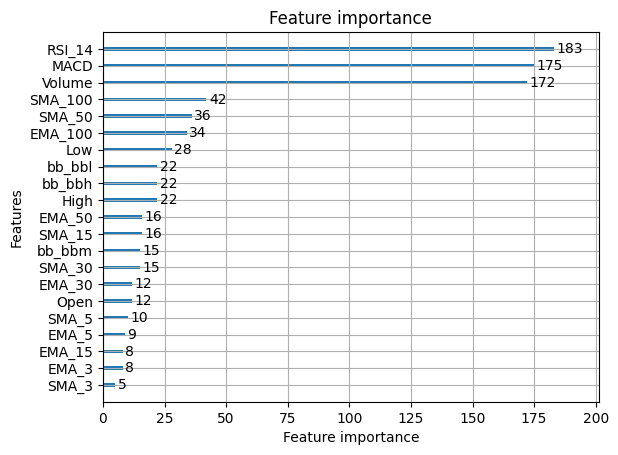

In [10]:
lgb.plot_importance(model.model_trained)

In [1]:
from dataset import *
import pandas as pd

df = pd.read_csv('data.csv')
df.set_index("Time", inplace=True)
data = Data(df.drop(['RSI_2','RSI_4','RSI_6','RSI_8', 'SMA_20', 'SMA_40', 'SMA_60', 'SMA_80', 'Target'], axis=1))

data.indicators_calc()
data.create_features_and_target(task_type='regression')
data.df

Open      High       Low     Close     Volume  \
Time                                                                     
2023-01-09 07:35:00  17206.05  17206.61  17196.10  17198.90  142.54265   
2023-01-09 07:36:00  17198.90  17205.52  17197.32  17199.18  130.69914   
2023-01-09 07:37:00  17199.53  17200.86  17196.31  17196.73   74.45345   
2023-01-09 07:38:00  17197.12  17197.94  17191.52  17193.67  126.46866   
2023-01-09 07:39:00  17193.23  17194.56  17192.37  17193.19   56.20148   
...                       ...       ...       ...       ...        ...   
2023-02-19 20:30:00  24322.02  24360.68  24307.69  24354.57  368.99968   
2023-02-19 20:31:00  24354.57  24365.59  24331.49  24352.13  256.06983   
2023-02-19 20:32:00  24352.13  24364.22  24337.53  24359.96  214.97637   
2023-02-19 20:33:00  24360.76  24411.43  24350.81  24406.65  275.03299   
2023-02-19 20:34:00  24408.41  24431.85  24405.58  24418.98  291.29097   

                        RSI_14         SMA_3         EMA_3      SMA_5  \
Time                                                                    
2023-01-09 07:35:00  48.745912  17202.063333  17201.359573  17201.988   
2023-01-09 07:36:00  49.099988  17201.376667  17200.269786  17200.890   
2023-01-09 07:37:00  46.099077  17198.270000  17198.499893  17200.420   
2023-01-09 07:38:00  42.597259  17196.526667  17196.084947  17198.906   
2023-01-09 07:39:00  42.057563  17194.530000  17194.637473  17196.334   
...                        ...           ...           ...        ...   
2023-02-19 20:30:00  41.152974  24339.343333  24349.293190  24360.278   
2023-02-19 20:31:00  40.796491  24342.880000  24350.711595  24349.580   
2023-02-19 20:32:00  42.517296  24355.553333  24355.335798  24346.024   
2023-02-19 20:33:00  51.558891  24372.913333  24380.992899  24359.050   
2023-02-19 20:34:00  53.633042  24395.196667  24399.986449  24378.458   

                            EMA_5  ...       MACD      bb_bbm        bb_bbh  \
Time                               ...                                        
2023-01-09 07:35:00  17202.014953  ...   2.579172  17200.9405  17212.056578   
2023-01-09 07:36:00  17201.069969  ...   2.409359  17201.3355  17211.577468   
2023-01-09 07:37:00  17199.623313  ...   2.168738  17201.6235  17210.967992   
2023-01-09 07:38:00  17197.638875  ...   1.842586  17201.6815  17210.810932   
2023-01-09 07:39:00  17196.155917  ...   1.468065  17201.7340  17210.653001   
...                           ...  ...        ...         ...           ...   
2023-02-19 20:30:00  24356.787408  ... -26.265467  24387.1740  24454.208433   
2023-02-19 20:31:00  24355.234939  ... -26.469493  24384.7130  24453.085609   
2023-02-19 20:32:00  24356.809959  ... -26.407445  24382.1570  24450.217118   
2023-02-19 20:33:00  24373.423306  ... -25.376778  24380.4885  24444.296024   
2023-02-19 20:34:00  24388.608871  ... -23.538474  24380.1065  24442.887966   

                           bb_bbl   close_1   close_2   close_3   close_4  \
Time                                                                        
2023-01-09 07:35:00  17189.824422  17206.05  17201.24  17199.08  17204.67   
2023-01-09 07:36:00  17191.093532  17198.90  17206.05  17201.24  17199.08   
2023-01-09 07:37:00  17192.279008  17199.18  17198.90  17206.05  17201.24   
2023-01-09 07:38:00  17192.552068  17196.73  17199.18  17198.90  17206.05   
2023-01-09 07:39:00  17192.814999  17193.67  17196.73  17199.18  17198.90   
...                           ...       ...       ...       ...       ...   
2023-02-19 20:30:00  24320.139567  24321.94  24341.52  24377.74  24405.62   
2023-02-19 20:31:00  24316.340391  24354.57  24321.94  24341.52  24377.74   
2023-02-19 20:32:00  24314.096882  24352.13  24354.57  24321.94  24341.52   
2023-02-19 20:33:00  24316.680976  24359.96  24352.13  24354.57  24321.94   
2023-02-19 20:34:00  24317.325034  24406.65  24359.96  24352.13  24354.57   

                      close_5  Target  
Time                                   
20

In [ ]:
import pandas as pd
from model import *
import warnings
from dataset import *
warnings.filterwarnings("ignore")
df = pd.read_csv('data.csv')
df.set_index("Time", inplace=True)
data = Data(df)
data.indicators_calc()
data.create_target(task_type='classification')
model = Model(model_name="LightGBM", task_type="classification")
# output_dir_path = '/Users/arsenchik/Desktop/dipploma/machine_learning_in_hft/algotrading/model_training/optimization_results'
output_dir_path = '/home/kenny/algotrading/model_training/optimization_results'
model.optimize(data, output_dir_path, number_of_trials=50)

In [17]:
tss = TimeSeriesSplit(n_splits=5, test_size=3*24*60)
df = df.sort_index()

fold = 0
preds = []
scores = []

for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    clf = lgb.LGBMClassifier(n_estimators=1000)
    clf.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = clf.predict(X_test)
    preds.append(y_pred)
    score = f1_score(y_test, y_pred)
    scores.append(score)

[100]	training's binary_logloss: 0.652832	valid_1's binary_logloss: 0.695833
[200]	training's binary_logloss: 0.62319	valid_1's binary_logloss: 0.698619
[300]	training's binary_logloss: 0.597564	valid_1's binary_logloss: 0.702441
[400]	training's binary_logloss: 0.574426	valid_1's binary_logloss: 0.706435
[500]	training's binary_logloss: 0.553463	valid_1's binary_logloss: 0.711089
[600]	training's binary_logloss: 0.532816	valid_1's binary_logloss: 0.714488
[700]	training's binary_logloss: 0.514628	valid_1's binary_logloss: 0.717471
[800]	training's binary_logloss: 0.496315	valid_1's binary_logloss: 0.719973
[900]	training's binary_logloss: 0.480044	valid_1's binary_logloss: 0.722234
[1000]	training's binary_logloss: 0.465002	valid_1's binary_logloss: 0.725299
[100]	training's binary_logloss: 0.655826	valid_1's binary_logloss: 0.697673
[200]	training's binary_logloss: 0.628066	valid_1's binary_logloss: 0.702078
[300]	training's binary_logloss: 0.603626	valid_1's binary_logloss: 0.704248

In [18]:
print(f'score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

RMSE score across folds 0.4996
Fold scores:[0.5188419117647058, 0.5426714195848187, 0.48532948532948533, 0.4695270599707459, 0.4814723926380368]


In [ ]:
reg = xgb.XGBRegressor(booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
reg.fit(data[FEATURES], data[TARGET],
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)